# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...

    f_d = lambda q: ( f(x + h*q) - f(x) )/ (h*q)
    fder = 2*f_d(0.5) - f_d(1)
    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    val = deriv(lambda x: x**3, x, h)
    print("h: %5f -- value: %7.4g  -- error: %7.4g" % (h, val, abs(val)))

h: 0.010000 -- value:  -5e-05  -- error:   5e-05
h: 0.001000 -- value:  -5e-07  -- error:   5e-07
h: 0.000100 -- value:  -5e-09  -- error:   5e-09
h: 0.000010 -- value:  -5e-11  -- error:   5e-11


It could be perceived that, as the step size is reduced, the error of the derivative is reduced as well. This also happens when we want the step $|h|< ϵ $

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [3]:
from math import log
import matplotlib.pyplot as plt

def two_points_deriv(f, x, h):
    return (f(x+h)-f(x))/h
    
def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

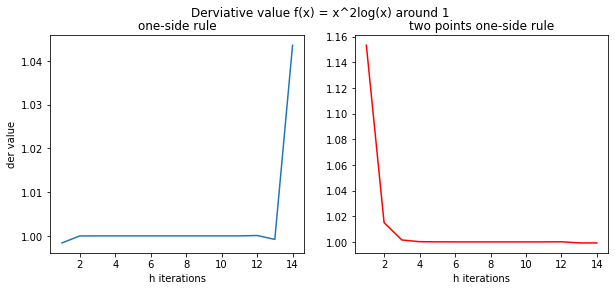

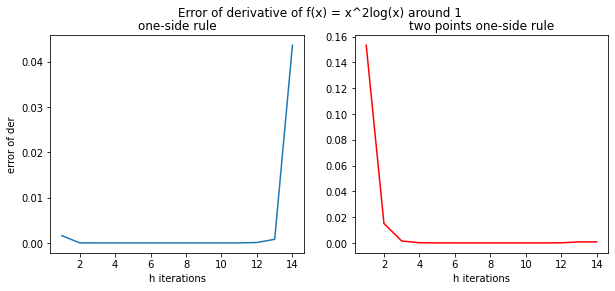

In [4]:
eps = []
len_x = range(1, 15)

one_sided = [deriv(f, 1, pow(10, -i)) for i in len_x] 
two_point = [two_points_deriv(f, 1, pow(10, -i)) for i in len_x] 
error_one_sided = [abs(fder(1) - deriv(f, 1, pow(10, -i))) for i in len_x] 
error_two_point = [abs(fder(1) - two_points_deriv(f, 1, pow(10, -i))) for i in len_x] 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

fig.suptitle("Derviative value f(x) = x^2log(x) around 1")
axes[0].plot(list(len_x), one_sided)
axes[0].title.set_text("one-side rule")
axes[0].set_xlabel("h iterations")
axes[0].set_ylabel("der value")
axes[1].plot(list(len_x), two_point, color= "red")
axes[1].title.set_text("two points one-side rule")
axes[1].set_xlabel("h iterations")

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("Error of derivative of f(x) = x^2log(x) around 1")
axes[0].plot(list(len_x), error_one_sided)
axes[0].title.set_text("one-side rule")
axes[0].set_xlabel("h iterations")
axes[0].set_ylabel("error of der")
axes[1].plot(list(len_x), error_two_point, color= "red")
axes[1].title.set_text("two points one-side rule")
axes[1].set_xlabel("h iterations")


plt.show()


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [5]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    val = deriv(f, x, h) 
    print("h: %5f -- value: %7.4g error: %7.4g" % (h, val, abs(val- fder(x))))

h: 0.010000 -- value: -0.006931 error: 0.006931
h: 0.001000 -- value: -0.0006931 error: 0.0006931
h: 0.000100 -- value: -6.931e-05 error: 6.931e-05
h: 0.000010 -- value: -6.931e-06 error: 6.931e-06


The derivative exists even when the x->0, because even when it is undefined when h gets smaller, the value of the derivaive gets closer to 0.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [6]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    N = 1
    delta = eps + 5
    integral_f = 10**30

    while delta > eps and N < 10**7 :
        h = (b - a)/N
        integral = 0

        for k in range(1, N+1):
            integral += func(h*k-h/2.0)*h
        
        delta = abs(integral_f - integral)
        integral_f = integral
        N *= 2
        
    return integral_f

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


Testing on the integral over x^2

In [7]:
def fint(x):
    return x**3/3

def result_int(a,b):
    # a: lower
    # b: upper

    return fint(b) - fint(a)

x = 0
a = 0
b = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    val = midpoint_rule(lambda x: x**2, a, b, h) 
    print("h: %5f -- value: %7.4g error: %7.4g" % (h, val, abs(val- result_int(a,b))))

h: 0.010000 -- value:   0.332 error: 0.001302
h: 0.001000 -- value:   0.333 error: 0.0003255
h: 0.000100 -- value:  0.3333 error: 2.035e-05
h: 0.000010 -- value:  0.3333 error: 1.272e-06


The difference among the analitic integral and the one done with the mid-point rule decreases as h decreases

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [8]:
import scipy
from scipy.special import sici
import math

In [9]:
from numpy import sqrt
def fint2(x):
    si, ci = sici(math.sqrt(x))
    return 2*si

def result_int2(a,b):
    # a: lower
    # b: upper

    return fint2(b) - fint2(a)

x = 0
a = 0
b = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    val = midpoint_rule(lambda x: (math.sin(math.sqrt(x))/x ), a, b, h) 
    print("h: %5f -- value: %7.4g error: %7.4g" % (h, val, abs(val- result_int2(a,b))))

h: 0.010000 -- value:   1.873 error:  0.0189
h: 0.001000 -- value:    1.89 error: 0.002363
h: 0.000100 -- value:   1.892 error: 0.0002089
h: 0.000010 -- value:   1.892 error: 0.0002089
